<a href="https://colab.research.google.com/github/EleonoraProietti/Master-Data-Analytics---ProfessionAI---Python-with-Google-Colab/blob/main/Customer_Segmentation_for_targeted_marketing_campaigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.float_format", lambda x: "%.2f" % x)


In [ ]:
# Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('credit_card_customers.csv')
df.head(10)

Saving credit_card_customers.csv to credit_card_customers.csv


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000.00,201.80,139.51,0.00,12
1,C10002,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000.00,4103.03,1072.34,0.22,12
2,C10003,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500.00,622.07,627.28,0.00,12
3,C10004,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500.00,0.00,NaN,0.00,12
4,C10005,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200.00,678.33,244.79,0.00,12
5,C10006,1809.83,1.00,1333.28,0.00,1333.28,0.00,0.67,0.00,0.58,0.00,0,8,1800.00,1400.06,2407.25,0.00,12
6,C10007,627.26,1.00,7091.01,6402.63,688.38,0.00,1.00,1.00,1.00,0.00,0,64,13500.00,6354.31,198.07,1.00,12
7,C10008,1823.65,1.00,436.20,0.00,436.20,0.00,1.00,0.00,1.00,0.00,0,12,2300.00,679.07,532.03,0.00,12
8,C10009,1014.93,1.00,861.49,661.49,200.00,0.00,0.33,0.08,0.25,0.00,0,5,7000.00,688.28,311.96,0.00,12
9,C10010,152.23,0.55,1281.60,1281.60,0.00,0.00,0.17,0.17,0.00,0.00,0,3,11000.00,1164.77,100.30,0.00,12


## EDA - Exploratory data analysis

In [ ]:
# General information
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.00,1564.47,2081.53,0.00,128.28,873.39,2054.14,19043.14
BALANCE_FREQUENCY,8950.00,0.88,0.24,0.00,0.89,1.00,1.00,1.00
PURCHASES,8950.00,1003.20,2136.63,0.00,39.63,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.00,592.44,1659.89,0.00,0.00,38.00,577.40,40761.25
INSTALLMENTS_PURCHASES,8950.00,411.07,904.34,0.00,0.00,89.00,468.64,22500.00
CASH_ADVANCE,8950.00,978.87,2097.16,0.00,0.00,0.00,1113.82,47137.21
PURCHASES_FREQUENCY,8950.00,0.49,0.40,0.00,0.08,0.50,0.92,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.00,0.20,0.30,0.00,0.00,0.08,0.30,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.00,0.36,0.40,0.00,0.00,0.17,0.75,1.00
CASH_ADVANCE_FREQUENCY,8950.00,0.14,0.20,0.00,0.00,0.00,0.22,1.50


In [ ]:
# Missing values

missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean()*100)

missing_df = pd.DataFrame({"Missing": missing, "Missing %": missing_percent})
print(missing_df)

# MINIMUM_PAYMENTS: can be 0 if the clients don't pay with credit card.

                                  Missing  Missing %
BALANCE                                 0       0.00
BALANCE_FREQUENCY                       0       0.00
CASH_ADVANCE                            0       0.00
CASH_ADVANCE_FREQUENCY                  0       0.00
CASH_ADVANCE_TRX                        0       0.00
CREDIT_LIMIT                            1       0.01
CUST_ID                                 0       0.00
INSTALLMENTS_PURCHASES                  0       0.00
MINIMUM_PAYMENTS                      313       3.50
ONEOFF_PURCHASES                        0       0.00
ONEOFF_PURCHASES_FREQUENCY              0       0.00
PAYMENTS                                0       0.00
PRC_FULL_PAYMENT                        0       0.00
PURCHASES                               0       0.00
PURCHASES_FREQUENCY                     0       0.00
PURCHASES_INSTALLMENTS_FREQUENCY        0       0.00
PURCHASES_TRX                           0       0.00
TENURE                                  0     

In [ ]:
# MINIMUM_PAYMENTS: replace missing values with 0 if the customer has no installments
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(0)

# CREDIT_LIMIT: median imputation
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median())

# PRCFULLPAYMENT: if NaN -> imputation with 0 (never paid all)
df["PRC_FULL_PAYMENT"] = df["PRC_FULL_PAYMENT"].fillna(0)

df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000.00,201.80,139.51,0.00,12
1,C10002,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000.00,4103.03,1072.34,0.22,12
2,C10003,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500.00,622.07,627.28,0.00,12
3,C10004,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500.00,0.00,0.00,0.00,12
4,C10005,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200.00,678.33,244.79,0.00,12
5,C10006,1809.83,1.00,1333.28,0.00,1333.28,0.00,0.67,0.00,0.58,0.00,0,8,1800.00,1400.06,2407.25,0.00,12
6,C10007,627.26,1.00,7091.01,6402.63,688.38,0.00,1.00,1.00,1.00,0.00,0,64,13500.00,6354.31,198.07,1.00,12
7,C10008,1823.65,1.00,436.20,0.00,436.20,0.00,1.00,0.00,1.00,0.00,0,12,2300.00,679.07,532.03,0.00,12
8,C10009,1014.93,1.00,861.49,661.49,200.00,0.00,0.33,0.08,0.25,0.00,0,5,7000.00,688.28,311.96,0.00,12
9,C10010,152.23,0.55,1281.60,1281.60,0.00,0.00,0.17,0.17,0.00,0.00,0,3,11000.00,1164.77,100.30,0.00,12


In [ ]:
# Inconsistencies check

# 1.Minimum_payments > Payments
incons_1 = df[df["MINIMUM_PAYMENTS"] > df["PAYMENTS"]]
print("Inconsistencies MINIMUM_PAYMENTS > PAYMENTS: ", incons_1.shape[0],". There are minimum payments higher than the total amount paid.")
# There are minimum payments higher than the total amount paid


# 2.Purchases != OneOff + Installments
df["CHECK_PURCHASES"] = df["ONEOFF_PURCHASES"] + df["INSTALLMENTS_PURCHASES"]
incons_2 = df[np.abs(df["CHECK_PURCHASES"] - df["PURCHASES"])>1]
print("Inconsistencies PURCHASES: ", incons_2.shape[0],". Total quantity of purchases other than the maximum amount of purchases made in a single solution.")
# Total quantity of purchases other than the maximum amount of purchases made in a single solution


# 3.Cash Advance > 0 but no transaction
incons_3 = df[(df["CASH_ADVANCE"] > 0) & (df["CASH_ADVANCE_TRX"] == 0)]
print("Inconsistencies CASH ADVANCE: ", incons_3.shape[0],". There are no inconsistencies.")
# There are no inconsistencies

# 4.Balance > Credit Limit
incons_4 = df[df["BALANCE"] > df["CREDIT_LIMIT"]]
print("Inconsistencies BALANCE > CREDIT LIMIT: ", incons_4.shape[0],". Current account balance amount greater than the maximum credit card limit.")
# Current account balance amount greater than the maximum credit card limit

# 5.PRCFULLPAYMENT fuori range [0,1]
incos_5 = df[(df["PRC_FULL_PAYMENT"] < 0) | (df["PRC_FULL_PAYMENT"] > 1)]
print("PRCFULLPAYMENT fuori range: ", incos_5.shape[0],". They are not out of range for full payment.")
# They are not out of range for full payment

Inconsistencies MINIMUM_PAYMENTS > PAYMENTS:  2365 . There are minimum payments higher than the total amount paid.
Inconsistencies PURCHASES:  19 . Total quantity of purchases other than the maximum amount of purchases made in a single solution.
Inconsistencies CASH ADVANCE:  0 . There are no inconsistencies.
Inconsistencies BALANCE > CREDIT LIMIT:  227 . Current account balance amount greater than the maximum credit card limit.
PRCFULLPAYMENT fuori range:  0 . They are not out of range for full payment.


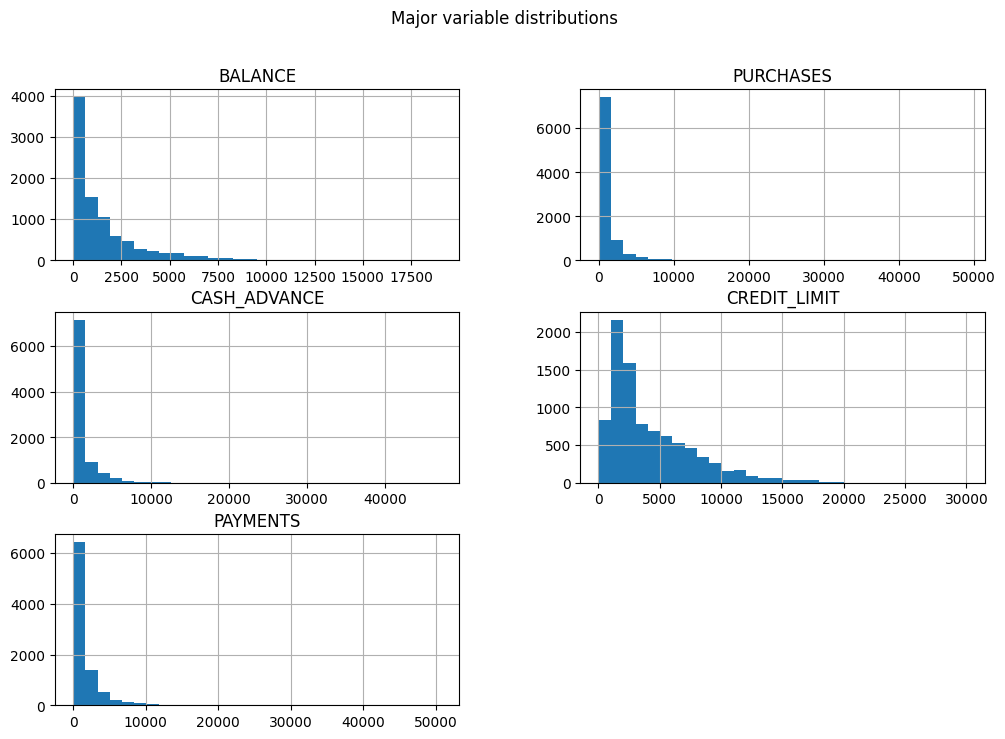

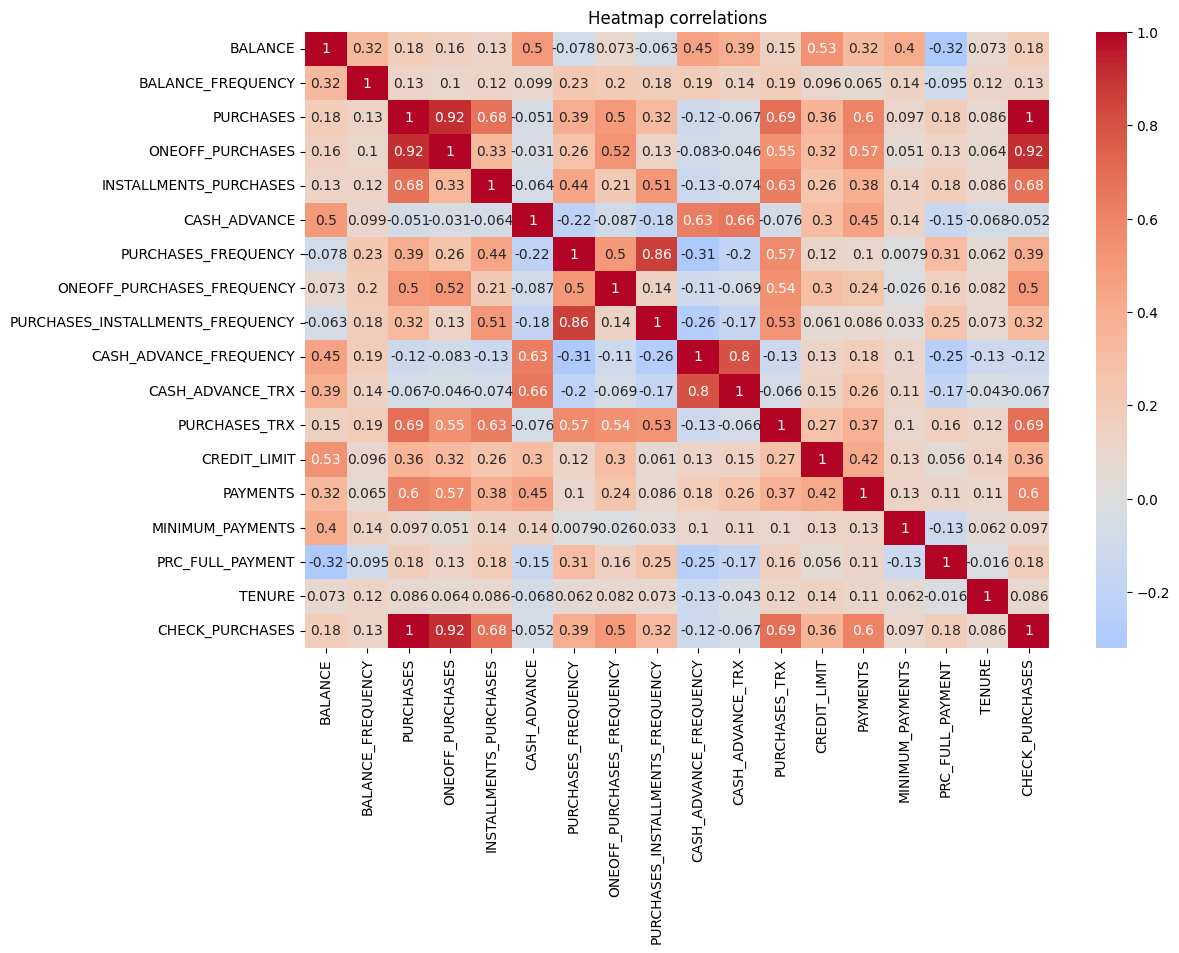

In [ ]:
# Main distributions
cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
df[cols].hist(bins=30, figsize=(12,8))
plt.suptitle("Major variable distributions")
plt.legend()
plt.show()

# Heatmap correlations
plt.figure(figsize=(12,8))
sns.heatmap(df.drop('CUST_ID', axis=1).corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap correlations")
plt.show()

## Prepocessing

In [ ]:
# Unique identifier removal
df_clean = df.drop("CUST_ID", axis=1)

# Replacement of missing data qith the column average
df_clean = df_clean.fillna(df_clean.mean())

# Normalization of variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

print("Shape dati normalizzati: ", X_scaled.shape)

Shape dati normalizzati:  (8950, 18)


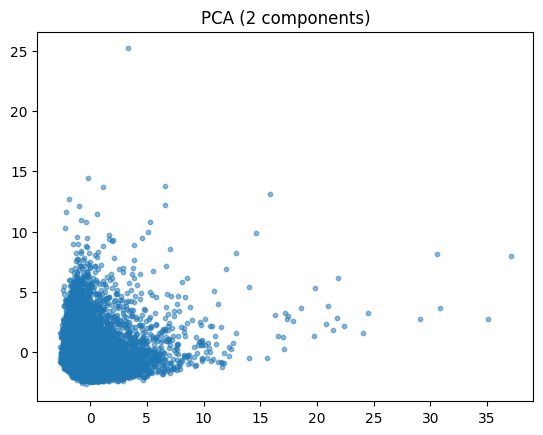

In [ ]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5, s=10)
plt.title("PCA (2 components)")
plt.show()

## Clustering with K-Means and Silhouette score

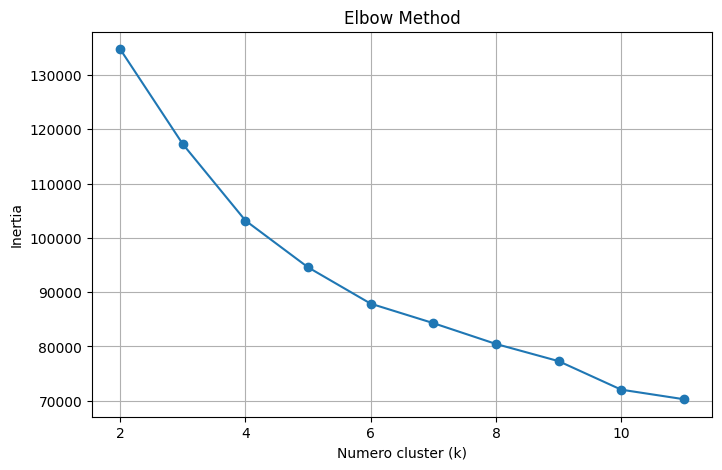

k=2: silhouette score=0.341
k=3: silhouette score=0.189
k=4: silhouette score=0.203
k=5: silhouette score=0.191
k=6: silhouette score=0.200
k=7: silhouette score=0.182
k=8: silhouette score=0.181
k=9: silhouette score=0.177
k=10: silhouette score=0.194
k=11: silhouette score=0.195


In [ ]:
# Elbow method
inertia = []
K = range(2,12)
for k in K:
  kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker="o")
plt.xlabel("Numero cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

#Silhouette score
for k in range(2,12):
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(X_scaled)
  score = silhouette_score(X_scaled, labels)
  print(f"k={k}: silhouette score={score:.3f}")

## Final model (k optimal)

Cluster
2    3049
5    2289
1    1308
0    1258
3     965
4      81
Name: count, dtype: int64


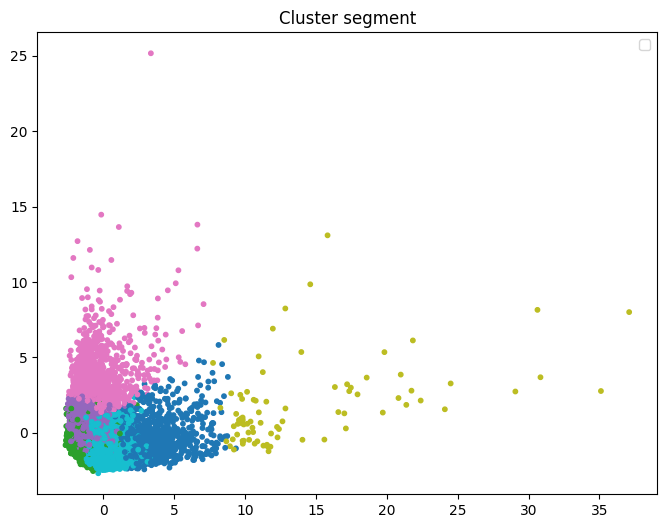

In [ ]:
k_opt = 6

kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

df["Cluster"] = labels
df["Cluster"] = kmeans.fit_predict(X_scaled)

print(df["Cluster"].value_counts())

#Visualizzazione PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cluster"], cmap="tab10", s=10)
plt.title("Cluster segment")
plt.legend()
plt.show()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CHECK_PURCHASES
Cluster,,,,,,,,,,,,,,,,,,
0,1939.78,0.98,3165.69,2150.52,1015.65,382.38,0.93,0.74,0.60,0.06,1.25,45.96,7217.49,2989.26,848.87,0.28,11.88,3166.17
1,111.83,0.37,331.53,209.67,122.09,335.34,0.27,0.08,0.18,0.04,0.81,4.12,3749.65,1093.19,127.20,0.23,11.30,331.76
2,1529.52,0.97,261.43,217.17,44.42,790.14,0.16,0.11,0.06,0.16,3.02,3.07,3266.09,967.60,774.82,0.02,11.51,261.59
3,4876.94,0.97,520.64,318.82,201.92,5048.01,0.30,0.14,0.19,0.51,15.76,7.99,8006.90,3943.30,2046.27,0.04,11.41,520.74
4,4598.11,0.98,16255.45,11012.90,5242.55,948.99,0.92,0.76,0.77,0.07,2.30,131.42,12387.65,15811.05,3473.97,0.40,11.96,16255.45
5,731.03,0.95,850.33,201.33,649.52,211.41,0.88,0.11,0.80,0.04,0.81,17.79,3298.96,998.28,703.98,0.25,11.48,850.85


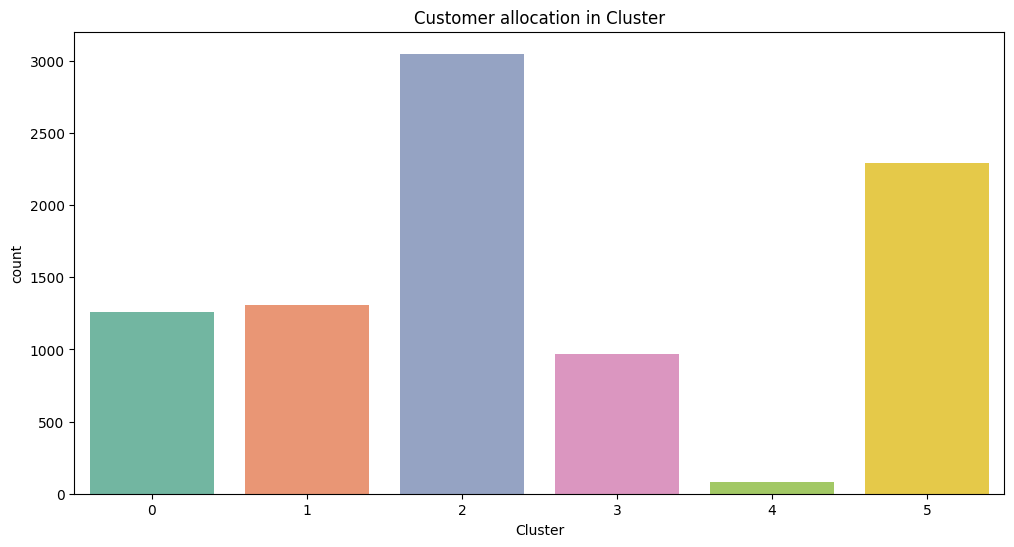

In [ ]:
# Cluster analysis
cluster_summary = df.drop('CUST_ID', axis=1).groupby("Cluster").mean()
display(cluster_summary)

# Countplot key variables
plt.figure(figsize=(12,6))
sns.countplot(x="Cluster", data=df, palette="Set2")
plt.title("Customer allocation in Cluster")
plt.show()

## Marketing interpretation

In [ ]:
for cluster in df["Cluster"].unique():
  temp = cluster_summary.loc[cluster]
  print(f"\n Cluster {cluster}:")
  if temp["PURCHASES"] > temp["CASH_ADVANCE"]:
    print("- Purchase-oriented customers -> cashback offers, promotions")
  if temp["CASH_ADVANCE"] > temp["PURCHASES"]:
    print("- Frequent use of cash advances -> propose peronal loans of cards with lower withdrawal costs")
  if temp["PURCHASES"] > temp["ONEOFF_PURCHASES"]:
    print("- Customers with strong spendig capacity -> promot gold/platinum cards, loyalty programs, premium insurance")
  if temp["INSTALLMENTS_PURCHASES"] > temp["ONEOFF_PURCHASES"]:
    print("-Customer prefer installment purchases -> promotions of financing and installments, scheduled purchases")
  if temp["PURCHASES"] == temp["CASH_ADVANCE"]:
    print("- Inactive customers -> incentives to use with welcome bonus, discounts")
  if temp["PRC_FULL_PAYMENT"] > 0.5:
    print("- Customers tend to pay the full balance -> loyalty with reward programs")


 Cluster 2:
- Frequent use of cash advances -> propose peronal loans of cards with lower withdrawal costs
- Customers with strong spendig capacity -> promot gold/platinum cards, loyalty programs, premium insurance

 Cluster 3:
- Frequent use of cash advances -> propose peronal loans of cards with lower withdrawal costs
- Customers with strong spendig capacity -> promot gold/platinum cards, loyalty programs, premium insurance

 Cluster 0:
- Purchase-oriented customers -> cashback offers, promotions
- Customers with strong spendig capacity -> promot gold/platinum cards, loyalty programs, premium insurance

 Cluster 5:
- Purchase-oriented customers -> cashback offers, promotions
- Customers with strong spendig capacity -> promot gold/platinum cards, loyalty programs, premium insurance
-Customer prefer installment purchases -> promotions of financing and installments, scheduled purchases

 Cluster 1:
- Frequent use of cash advances -> propose peronal loans of cards with lower withdrawal c